# Bài 2: Xử lý dữ liệu với Pandas
### Cài đặt và import thư viện
Chạy câu lệnh sau để cài đặt pandas vào môi trường ảo

In [ ]:
!pip install pandas

Để bắt đầu sử dụng, ta import thư viện.

In [1]:
import pandas as pd

## Series
**Series** là danh sách một chiều chứa dữ liệu, có chỉ số phần tử là một danh sách khác. Chỉ số phần tử của Series có thể là bất kỳ kiểu dữ liệu nào trong numpy.\
Xét ví dụ sau:

In [ ]:
fruits = pd.Series(["apple", "banana", "orange", "pear", "strawberry"])
fruits

0         apple
1        banana
2        orange
3         pearl
4    strawberry
dtype: object

Series `fruits` chứa các giá trị `"apple"`, `"banana"`, `"orange"`,…\
Có chỉ số phần tử là một danh sách các số `0`, `1`, `2`, `3`,…\
Kiểu dữ liệu của Series được in ở dưới cùng là pandas `object` (trong trường hợp này tương ứng với Python `str`)

Chỉ số phần tử của Series không chỉ giới hạn ở kiểu dữ liệu `int`.\
Dưới đây là một ví dụ thay đổi chỉ số phần tử mặc định của Series sang `str`, thông qua tham số `index`:

In [ ]:
fruits = pd.Series(["apple", "banana", "orange", "pear", "strawberry"],
                   index=['A', 'B', 'C', 'D', 'E'])
fruits

A         apple
B        banana
C        orange
D         pearl
E    strawberry
dtype: object

Có thể khởi tạo Series từ `dict` thay vì `list`.\
Ví dụ sau là cú pháp khởi tạo một Series với dữ liệu tương tự:

In [ ]:
fruits_dict = {
    'A': 'apple',
    'B': 'banana',
    'C': 'orange',
    'D': 'pear',
    'E': 'strawberry'
}

fruits = pd.Series(fruits_dict)
fruits

A         apple
B        banana
C        orange
D          pear
E    strawberry
dtype: object

## Thực hành: Thống kê cân nặng học sinh
Cho các số liệu cân nặng học sinh như sau: 
|Tên|Cân nặng|
|---|--------|
|Hoa|37 kg|
|Nam|48 kg|
|Hải|42 kg|
|Linh|39kg|
|Nhân|41kg|
|Phương|38kg|
|Thu|40 kg|
|Vũ|40 kg|
|Bảo|43 kg| 

Sử dụng pandas Series, tìm tên các bạn tương ứng với các cân nặng `mean`, `median`, `mode`.

In [ ]:
weights = pd.Series([38, 48, 42, 39, 41, 38, 40, 40, 43],
                    index=["Hoa", "Nam", "Hải", "Linh", "Nhân", "Phương", "Thu", "Vũ", "Bảo"])
weights

Hoa       38
Nam       48
Hải       42
Linh      39
Nhân      41
Phương    38
Thu       40
Vũ        40
Bảo       43
dtype: int64

In [ ]:
print(weights.mean())
print(weights.median())
print(weights.mode())


41.0
40.0
0    38
1    40
dtype: int64


In [ ]:
weights = pd.Series([38, 48, 42, 39, 41, 38, 40, 40, 100],
                    index=["Hoa", "Nam", "Hải", "Linh", "Nhân", "Phương", "Thu", "Vũ", "Bảo"])
print(weights.mean())
print(weights.median())
print(weights.mode())

47.333333333333336
40.0
0    38
1    40
dtype: int64


In [ ]:
weights = pd.Series([40, 40, 42, 40, 42, 40, 40, 40, 42],
                    index=["Hoa", "Nam", "Hải", "Linh", "Nhân", "Phương", "Thu", "Vũ", "Bảo"])
print(weights.mean())
print(weights.median())
print(weights.mode())

40.666666666666664
40.0
0    40
dtype: int64


In [ ]:
ratings = pd.Series([4,3,1,1,5,1,1])
print(ratings.mean())
print(ratings.median())
print(ratings.mode())

2.2857142857142856
1.0
0    1
dtype: int64


## DataFrame 
**DataFrame** là cấu trúc dữ liệu 2 chiều, được tổ chức theo dạng bảng – gồm hàng và cột. Mỗi cột trong DataFrame chính là một Series.\
Xét ví dụ sau về thông tin động vật quý hiếm tại Việt Nam:

In [2]:
animals = pd.DataFrame({
    "dong_vat": ["Sao la", "Khỉ đuôi ngắn", "Voi châu Á"],
    "tuoi_tho": [25, 25, 70],
    "loai": ["có vú", "linh trưởng", "có vú"]
})

animals

,dong_vat,tuoi_tho,loai
0,Sao la,25,có vú
1,Khỉ đuôi ngắn,25,linh trưởng
2,Voi châu Á,70,có vú


Đoạn code trên khởi tạo DataFrame từ Python `dict`, trong đó:
* Các keys `dong_vat`, `tuoi_tho`, `loai` trong `dict` tương ứng với tên các cột
* Các danh sách values trong `dict` tương ứng với các giá trị của cột đó.

### Một số lệnh với DataFrame
`DataFrame.info()` tóm tắt thông tin về DataFrame:
* Khoảng chỉ số RangeIndex: 0 đến 2
* Thông tin các cột: số giá trị khác rỗng, kiểu giá trị
* Bộ nhớ mà pandas sử dụng để load DataFrame: 200 bytes

In [ ]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dong_vat  3 non-null      object
 1   tuoi_tho  3 non-null      int64 
 2   loai      3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


Hai lệnh `DataFrame.head(n)` và `DataFrame.tail(n)` có tác dụng in ra màn hình `n` hàng đầu và `n` hàng cuối của DataFrame.\
Mặc định `n=5`.

In [24]:
animals.head(2)

,dong_vat,tuoi_tho,loai
0,Sao la,25,có vú
1,Khỉ đuôi ngắn,25,linh trưởng


## Đọc - viết dữ liệu
Ta đã biết cách tạo Series và DataFrame. Tuy nhiên chúng ta sẽ hầu như không tự tạo dữ liệu bằng tay mà sẽ đọc dữ liệu được cung cấp.\
Dữ liệu được lưu dưới nhiều dạng khác nhau (`.txt`, `.xlsx`, `.json`, `.db`). Trong đó, loại phổ biến nhất mà ta sẽ gặp là `.csv`.

Hãy mở thử một file `zoo.csv`, thường sẽ có format như sau:
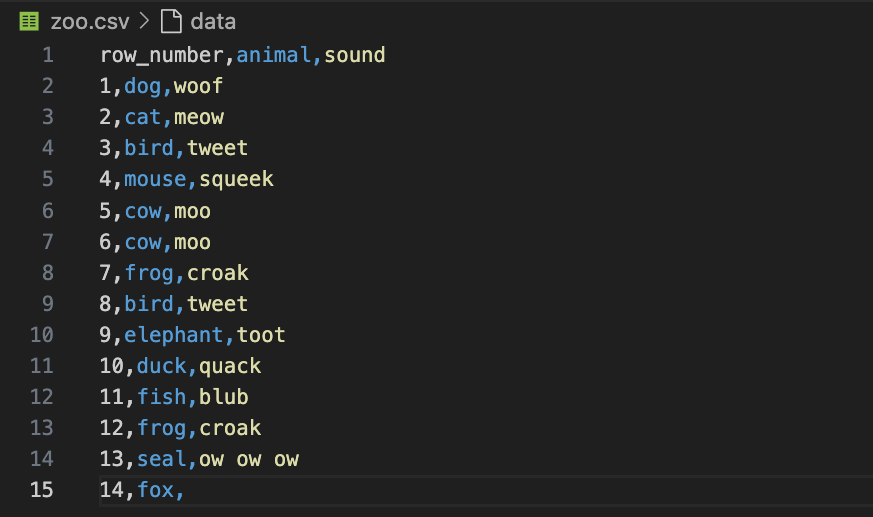


### Đọc dữ liệu
Để đọc được file `zoo.csv` này thành DataFrame, ta dùng cú pháp `pd.read_csv()`.\
Trong đó `index_col=0` dùng để chỉ cột đầu tiên trong dữ liệu chính là index.

In [18]:
zoo_df = pd.read_csv("zoo.csv", index_col=0)
zoo_df

,animal,sound
row_number,,
1,dog,woof
2,cat,meow
3,bird,tweet
4,mouse,squeek
5,cow,moo
6,cow,moo
7,frog,croak
8,bird,tweet
9,elephant,toot


Vì DataFrame sẽ tự tạo index nên ta có thể bỏ tên index `row_number` này.\
Thực hiện thông qua lệnh `DataFrame.rename_axis()` như sau:

In [19]:
zoo_df = zoo_df.rename_axis(index=None)
zoo_df

,animal,sound
1,dog,woof
2,cat,meow
3,bird,tweet
4,mouse,squeek
5,cow,moo
6,cow,moo
7,frog,croak
8,bird,tweet
9,elephant,toot
10,duck,quack


### Viết dữ liệu
Sau khi chỉnh sửa, ta cần viết lại dữ liệu này thành file `zoo_new.csv`.\
Viết file csv sử dụng lệnh `DataFrame.to_csv()` như sau:

In [21]:
zoo_df.to_csv("zoo_new.csv", index=False)

## Truy cập dữ liệu
### Truy cập theo cột
Để truy cập từng cột, sử dụng key/tên cột để truy cập (tương tự với Python `dict`).\
Kết quả trả về là một Series.

In [ ]:
animals["dong_vat"]

0           Sao la
1    Khỉ đuôi ngắn
2       Voi châu Á
Name: dong_vat, dtype: object

Hoặc sử dụng tên cột như thuộc tính của DataFrame và truy cập qua dấu `.`\
Tuy nhiên cách này không sử dụng được khi tên cột có dấu cách hoặc ký tự đặc biệt.

In [9]:
animals.tuoi_tho

dong_vat
Sao la           25
Khỉ đuôi ngắn    25
Voi châu Á       70
Name: tuoi_tho, dtype: int64

Để truy cập nhiều cột, sử dụng danh sách key/tên cột để truy cập.\
Kết quả trả về là một DataFrame.

In [4]:
animals[["dong_vat", "tuoi_tho"]]

,dong_vat,tuoi_tho
0,Sao la,25
1,Khỉ đuôi ngắn,25
2,Voi châu Á,70


Ta có thể biến cột động vật thành chỉ số để truy cập vào các phần tử bằng lệnh `DataFrame.set_index()`.\
Tham số `inplace=True` có tác dụng cập nhật vào thẳng DataFrame.

In [ ]:
animals.set_index("dong_vat", inplace=True)
# or
# animals = animals.set_index("dong_vat")
animals

Lệnh `DataFrame.reset_index()` undo thao tác set_index phía trên

In [ ]:
animals.reset_index(inplace=True)

### Truy cập theo hàng
Ta có thể lọc các hàng của DataFrame bằng cú pháp index slicing.

In [ ]:
animals[:2]

,dong_vat,tuoi_tho,loai
0,Sao la,25,có vú
1,Khỉ đuôi ngắn,25,linh trưởng


## Lọc dữ liệu
### Lọc chỉ số

In [ ]:
animals.iloc[:2, 1:3]

,tuoi_tho,loai
0,25,có vú
1,25,linh trưởng


In [ ]:
animals.loc[animals.tuoi_tho>50, "tuoi_tho": "loai"]

,tuoi_tho,loai
dong_vat,,
Voi châu Á,70,có vú


In [ ]:
animals

,dong_vat,tuoi_tho,loai
0,Sao la,25,có vú
1,Khỉ đuôi ngắn,25,linh trưởng
2,Voi châu Á,70,có vú


### Lọc boolean
Có thể áp dụng biểu thức điều kiện lên các giá trị của cột để lọc các hàng thoả mãn.\
Ví dụ dưới đây lấy dữ liệu 2 cột động vật và tuổi thọ (`age_data`). Sau đó sử dụng lọc boolean đểlaays các hàng có tuổi thọ nhỏ hơn 30 năm.

In [7]:
animals[animals["tuoi_tho"] < 30]

,tuoi_tho,loai
dong_vat,,
Sao la,25,có vú
Khỉ đuôi ngắn,25,linh trưởng


In [ ]:
animals.set_index("dong_vat", inplace=True)
animals.loc[["Sao la", "Khỉ đuôi ngắn"], "tuoi_tho":"loai"]